
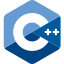
<br>

<div style="text-align:center; font-size:200%;">
 <b>Adventure V2</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 17 Adventure V2.ipynb -->
<!-- slides/module_500_solid_grasp/topic_240_grasp_low_coupling.cpp -->


### Aktueller Stand des Adventure-Spiels

- `code/completed/adventure/v2`
- `code/starter_kits/adventure_sk2`
- Klassen `Location` und `World`
- `World` erzeugt `Location`-Objekte (Creator)
- `World` kann `Location`-Objekte finden (Information Expert)


### Nächster Schritt

- Verbinden der `Location`-Objekte
- Zwei neue Verantwortlichkeiten:
  - Erstellen der Verbindungen (Doing)
  - Speichern der Verbindungen (Knowing)


### Wer soll die Verbindungen erzeugen?

**Creator:** Wer hat die Initialisierungsdaten?

- `World`
- (Wir brauchen die Daten aller Locations)


### Wer soll die Verbindungen speichern?

**Information Expert:** Wer hat die Daten?

- Die Klasse mit den meisten Informationen
- `World` erzeugt alle Verbindungsdaten
- Daher ist World der Information Expert
- Die Verbindungsdaten werden in `World` gespeichert


**Das ist keine Richtige Anwendung von Information Expert!**


### Was ist das Problem?

- Sehen wir uns eine Implementierung davon an:
- `code/completed/adventure/v3a`
- Was ist der häufigste Anwendungsfall, bei dem Verbindungen benötigt werden?
  - Navigation von der Location, auf der ein Pawn steht zu einer anderen
    Location
- Wie geht das mit dieser Implementierung?
  - `world.GetConnectedLocation(room1, "north")`
  - Wir haben eine Abhängigkeit von `World` und `Location`!


### Wie können wir das vermeiden?

- Verlagern der Verantwortlichkeit für die Navigation
- Jede `Location` kennt ihre ausgehenden Verbindungen
- `room1.GetConnectedLocation("north") == room2`


### Hat uns Information Expert in die Irre geführt?

- Nein. In diesem Fall sagt der Information Expert nicht sehr viel aus,
  wenn wir ihn korrekt anwenden:
  - Die Verantwortung, die wir zuweisen wollen, ist das Speichern der
    Verbindungen
  - Jede Verbindung ist eine Beziehung zwischen zwei Locations
  - Daher ist `Location` ein mindestens genau so starker Information Expert
    wie `World`
  - Es spielt keine sehr große Rolle, dass `World` alle Locations kennt


### Merkregel: Lokale Informationen > Globaler Zustand

- Manchmal kann man durch den Information Expert verleite werden
  Informationen zu global zu betrachten
- Versuchen Sie, die Verantwortlichkeit für Informationen möglichst lokal zu
  halten
- Das verringert fast immer die Kopplung im System


## Niedrige Kopplung (Low Coupling, GRASP)

### Frage

Wie können wir den negativen Einfluss von Änderungen minimieren?

### Antwort

Weise Verantwortlichkeiten so zu, dass die (unnötige) Kopplung minimiert wird



### Kommentare

- Niedrige Kopplung ist ein sehr allgemeines Prinzip, das in vielen
  Situationen angewendet werden kann.
- Kopplung gibt an, wie stark die Abhängigkeiten zwischen zwei Artefakten
  sind (Funktionen, Klassen, Module, ...)
- Es gibt [viele verschiedene
  Arten](https://en.wikipedia.org/wiki/Coupling_(computer_programming)#Types_of_coupling)
  von Kopplung
- Enge Kopplung
  - Verhindert, dass wir Teile des Systems unabhängig voneinander verstehen und ändern können
  - Veranlasst, dass Änderungen sich durch das ganze System durchziehen
- Lose Kopplung
  - Ist besonders wichtig von *stabilen* zu *instabilen* Teilen des Systems


### Vermeidung von Kopplung

- Ein gewisses Maß an Kopplung ist **unvermeidlich**
  - Wann immer zwei Komponenten zusammenarbeiten entsteht Kopplung
- Enge Kopplung an **stabile** Komponenten ist typischerweise kein Problem
  - Beispiel: `std::vector`
- Enge Kopplung auf lokaler Ebene
  - Ist nicht gut, aber oft kein großes Problem
  - Kann typischerweise relativ leicht behoben werden
- Enge Kopplung auf globaler Ebene
  - Ist sehr schwer zu beseitigen
  - Sollte während der Entwicklung immer im Fokus sein


### Code Smells die auf hohe Kopplung hinweisen

- [Shotgun Surgery](https://blog.ndepend.com/shotgun-surgery/)
  - Small changes in functionality require changes in many parts of the code
  - Often connected to low cohesion
- [Divergent Change](https://blog.ndepend.com/divergent-change/)
  - Many changes in functionality require changes in the same part of the
    codebase


### Wie können wir Kopplung vermeiden?

- GRASP: Creator, Information Expert
- SOLID: Single Responsibility Principle, Dependency Inversion Principle
- Law of Demeter
  - Eine Komponente sollte nur mit Komponenten kommunizieren, die sie direkt
    kennt